The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


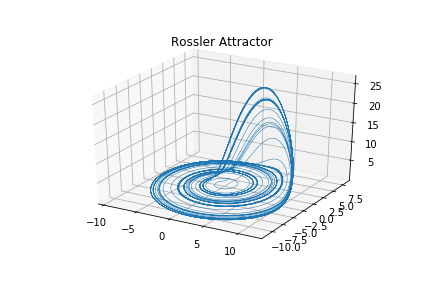

In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def rossler(xyz, *, a=0.2, b=0.2, c=5.7):
    _, x, y, z = xyz
    x_dot = -y-z
    y_dot = x + a*y
    z_dot = b + z*(x-c)
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 40000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + rossler(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[0:30000].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Rossler Attractor")

plt.show()

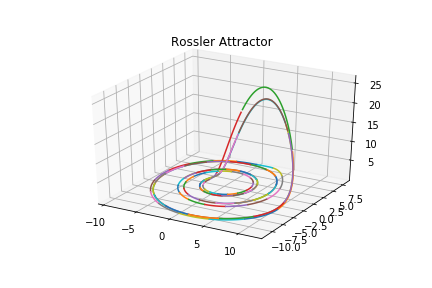

[6.0, 4.0]

In [16]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[35000:40000]
xyz_coords = xyz_coords[35000:40000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 40
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,300):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Rossler Attractor")

plt.show()
plt.rcParams['figure.figsize']

In [17]:
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 9)
print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[ 0.25844399,  0.47324771, -1.80827048,  1.94821934, -0.54394012, -0.62683173,
  -1.99868916,  0.17727686, -0.21442314]]
def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)

project = True
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

Trajectory shape before embedding:
(40, 4)
[[ 1.51614074  0.63195591  0.5630666   1.52896686 -0.28520966  1.03133099
   1.04151116  0.39627805 -1.23586825]]
Trajectory shape after embedding and projecting:
(40, 2)


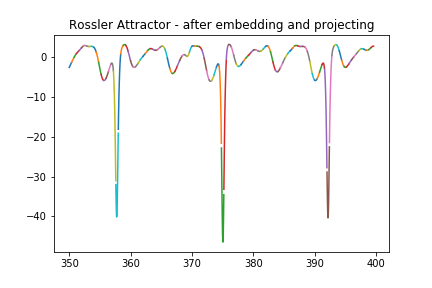

In [18]:
if project == True and traj_list[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Rossler Attractor - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Rossler Attractor - after embedding and projecting")
    plt.show()

In [8]:
t2s = Traj2Sim()

load=False

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='rossler.npy')
    if load == True:
        t2s.load_bifilt(filename='rossler.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='rossler_hdto1d.npy')
    if load == True:
        t2s.load_bifilt(filename='rossler_hdto1d.npy')

|████████████████████▍                   | ▃▅▇ 3888/7626 [51%] in 8:19 (7.8in 1s (6.2/s, et54/7626 [1%] in 8s (6.7/s, e 56/7626 [1%] in 8s (6.7/s, ein 10s (6.9/s, ▄▆█ 96/7626 [1%] in 14s (6.9/s,  (7.0/s,120/7626 [2%] in 17s (7.0/s, (7.0/s,▄▆█ 151/7626 [2%] in 22s (7.0/s,(7.0/s,159/7626 [2%] in 23s (6.9/s,179/7626 [2%] in 26s (6.9/s, ▄▆█ 181/7626 [2%] in 26s (6.9/s, (6.9/s,200/7626 [3%] in 29s (6.9/s, 214/7626 [3%] in 31s (6.9/s, ▄▆█ 215/7626 [3%] in 31s (6.9/s, (6.9/s, 222/7626 [3%] in 32s (6.9/s,(6.8/s, 253/7626 [3%] in 37s (6.8/s,267/7626 [4%] in 39s (6.8/s, in 41s (6.8/s, in 45s (6.8/s,318/7626 [4%] in 46s (6.8/s, 323/7626 [4%] in 47s (6.9/s, ▄▆█ 346/7626 [5%] in 50s (6.9/s,in 51s (6.9/s, ▃▁▃ 355/7626 [5%] in 51s (6.9/s,405/7626 [5%] in 58s (6.9/s, in 59s (6.9/s,▃▁▃ 438/7626 [6%] in 1:03 (7.0/s ▅▃▁ 449/7626 [6%] in 1:05 (7.0/s 453/7626 [6%] in 1:06 (6.9/s▆▄▂ 461/7626 [6%] in 1:07 (6.9/s (6.9/s488/7626 [6%] in 1:11 (6.9/s▃▁▃ 499/7626 [7%] in 1:12 (6.9/s ▄▆█ 506/7626 [7%] in 1:13 (6.9

|████████████████████████████████████████| 7626/7626 [100%] in 16:01.6 (7.93897/7626 [51%] in 8:20 (7.8 3903/7626 [51%] in 8:21 (7.8▅▇▇ 3958/7626 [52%] in 8:27 (7.8 3964/7626 [52%] in 8:28 (7.8 in 8:29 (7.8 4001/7626 [52%] in 8:32 (7.8in 8:32 (7.8 (7.8in 8:35 (7.8 ▂▄▆ 4039/7626 [53%] in 8:37 (7.8 4042/7626 [53%] in 8:37 (7.8(7.8in 8:40 (7.8in 8:45 (7.8in 8:45 (7.8in 8:46 (7.8 4132/7626 [54%] in 8:48 (7.8(7.84176/7626 [55%] in 8:54 (7.8 ▅▃▁ 4188/7626 [55%] in 8:55 (7.8in 8:59 (7.8 in 9:00 (7.8(7.8▁▃▅ 4240/7626 [56%] in 9:02 (7.8in 9:02 (7.8in 9:06 (7.8▆█▆ 4277/7626 [56%] in 9:06 (7.8(7.8 4295/7626 [56%] in 9:08 (7.8 (7.8 in 9:14 (7.84338/7626 [57%] in 9:14 (7.8 in 9:15 (7.8▁▃▅ 4354/7626 [57%] in 9:16 (7.8 in 9:17 (7.8in 9:17 (7.8 in 9:20 (7.8 in 9:21 (7.8█▆▄ 4414/7626 [58%] in 9:23 (7.8 4418/7626 [58%] in 9:24 (7.8 ▂▄▆ 4456/7626 [58%] in 9:29 (7.8 4459/7626 [58%] in 9:29 (7.8 ▅▃▁ 4466/7626 [59%] in 9:30 (7.84477/7626 [59%] in 9:31 (7.8 4479/7626 [59%] in 9:31 (7.8 ▁▃▅ 4490/7626 [59%] in

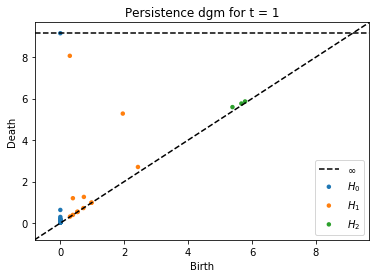

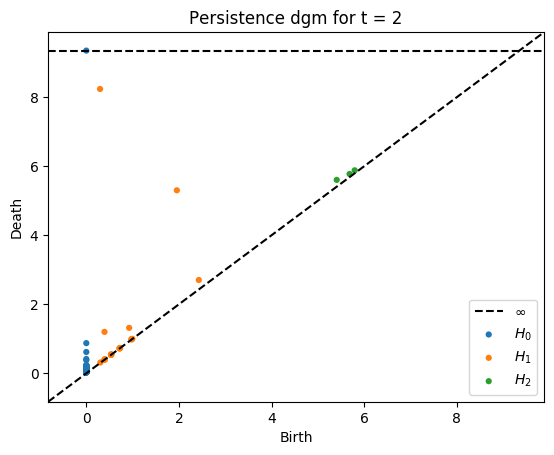

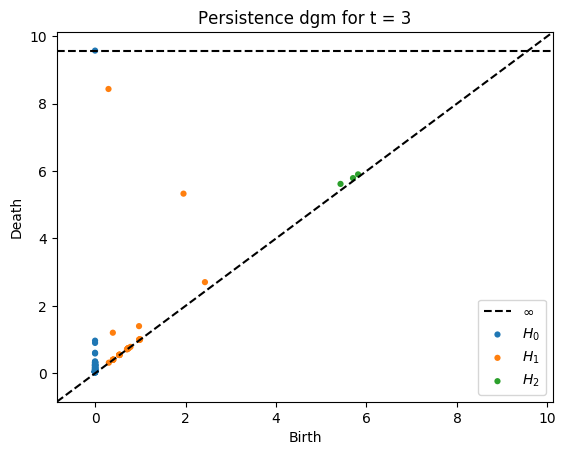

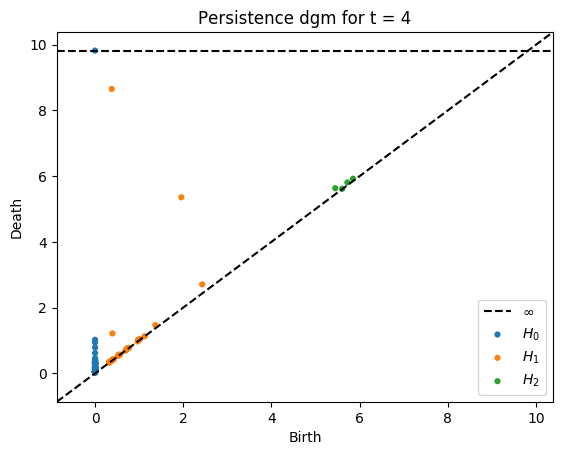

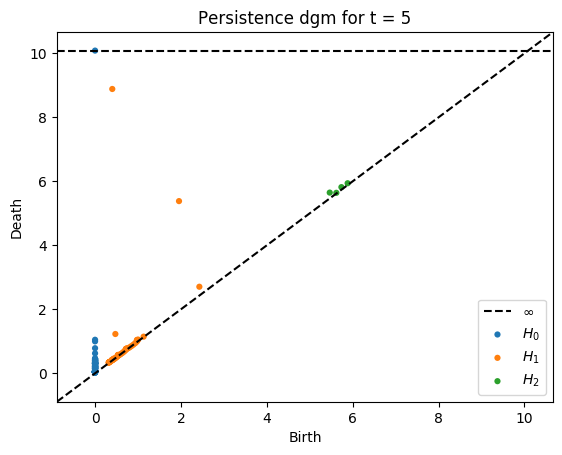

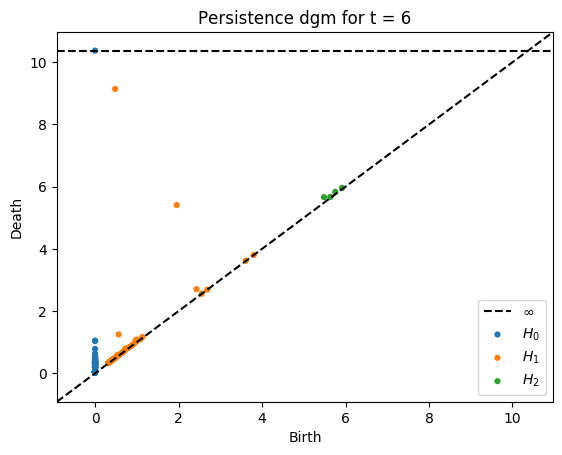

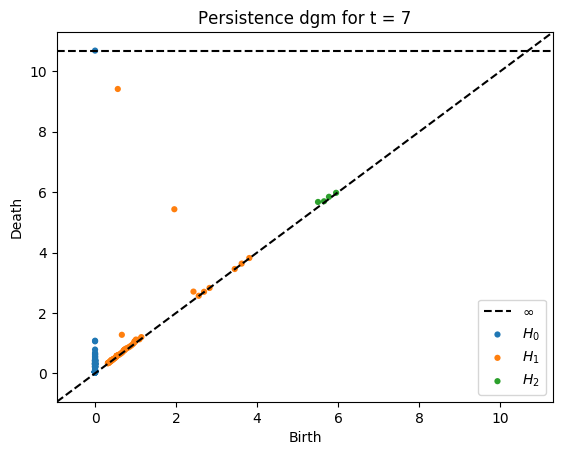

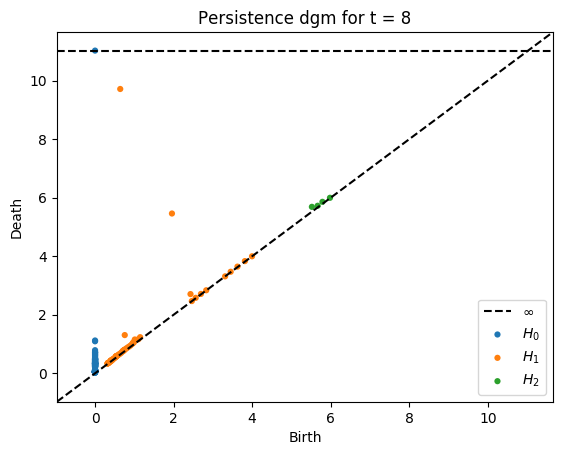

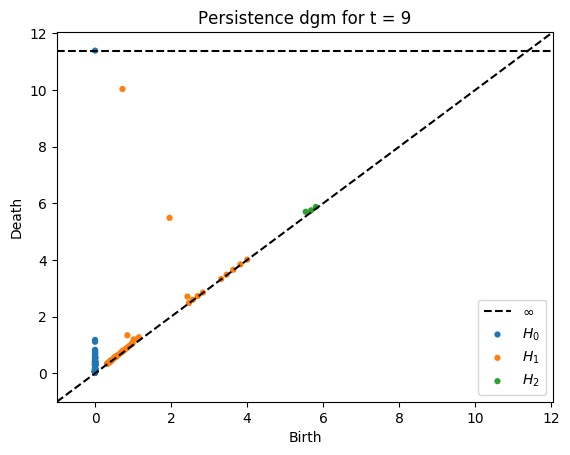

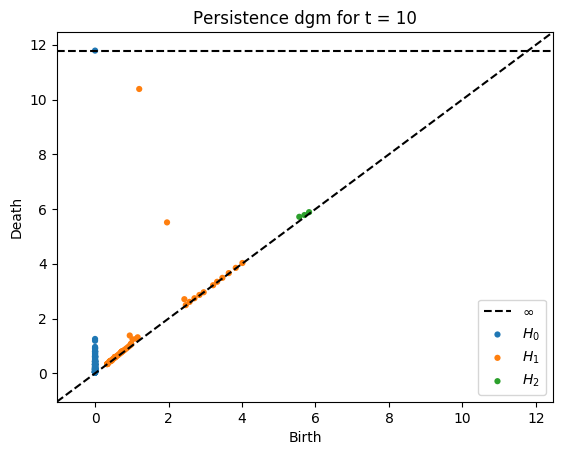

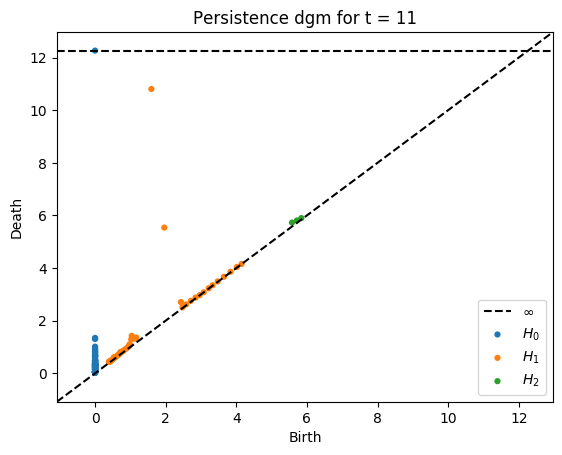

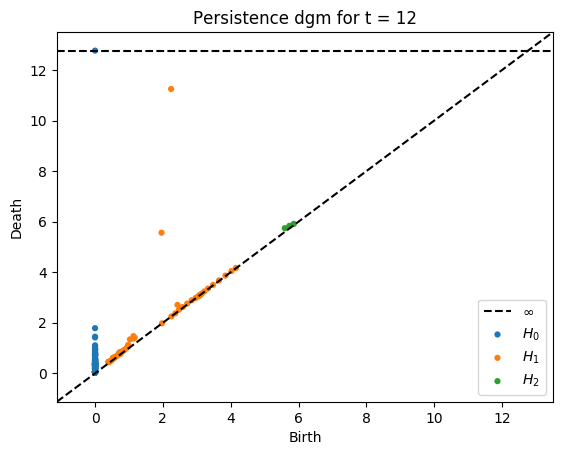

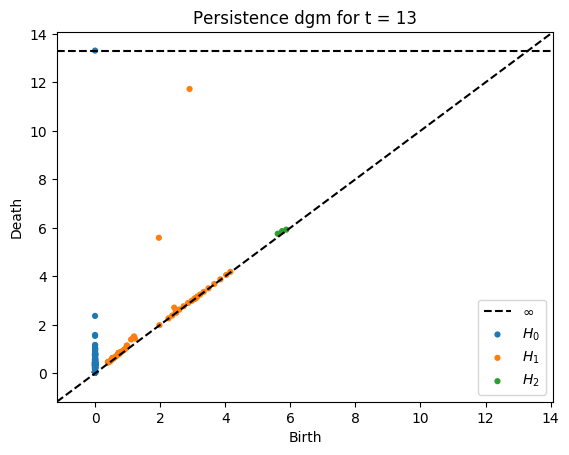

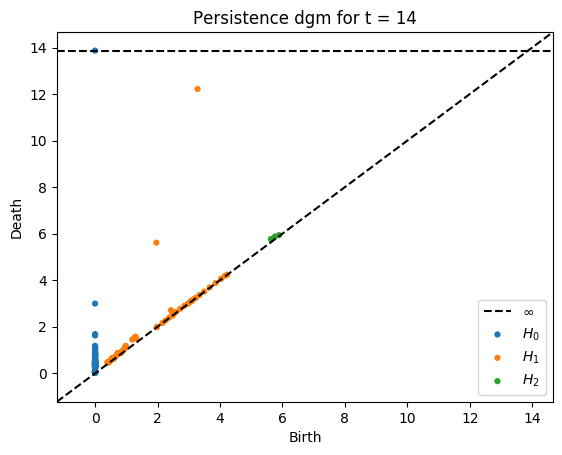

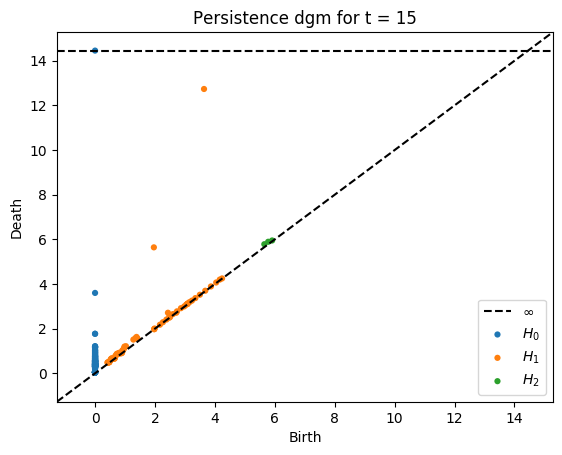

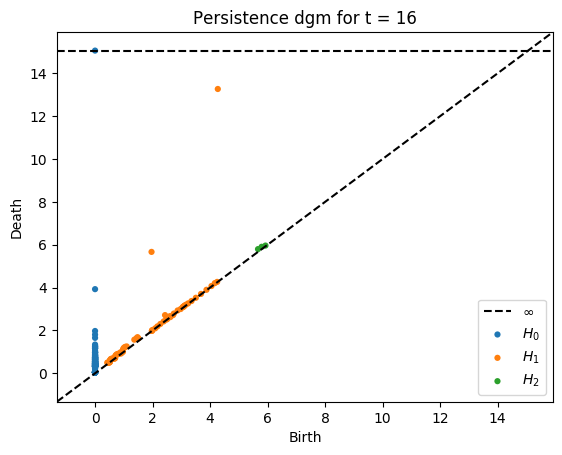

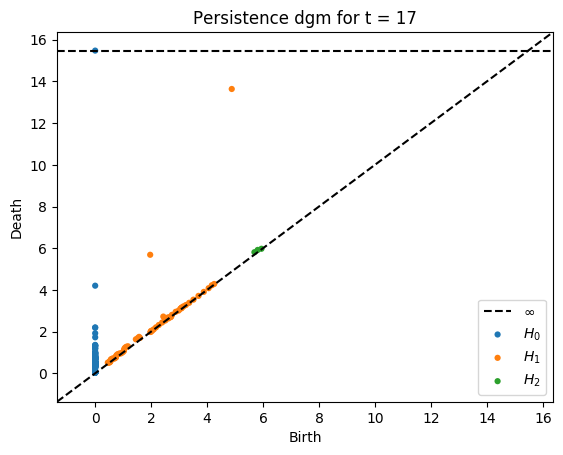

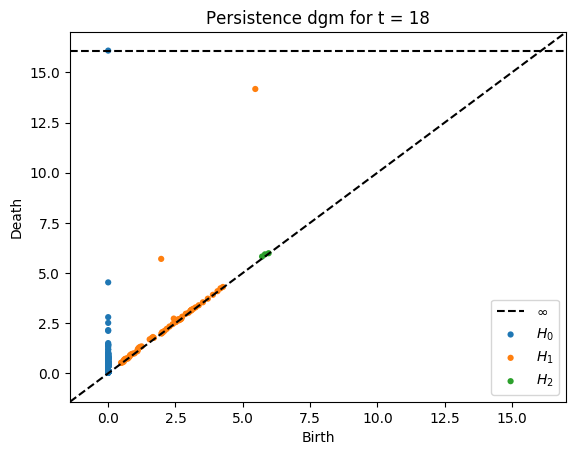

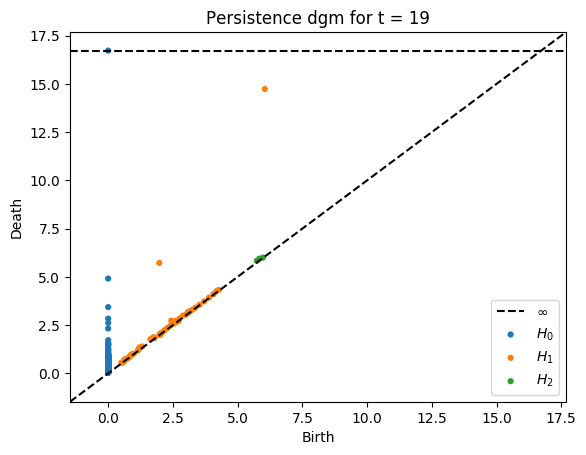

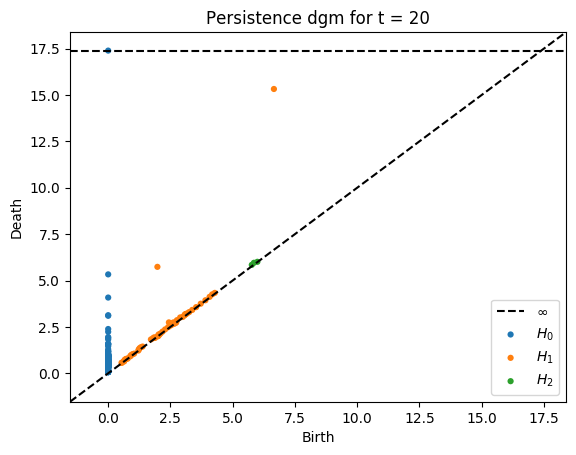

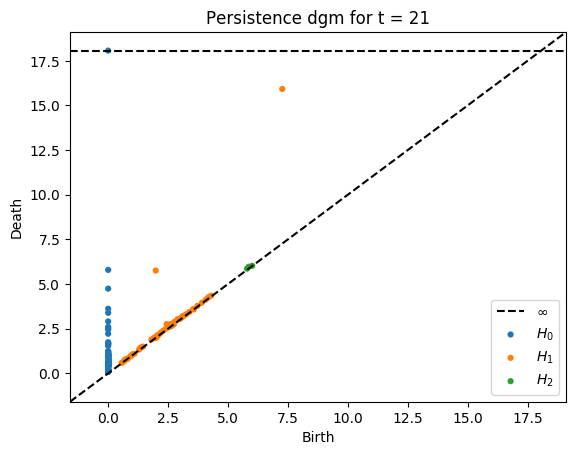

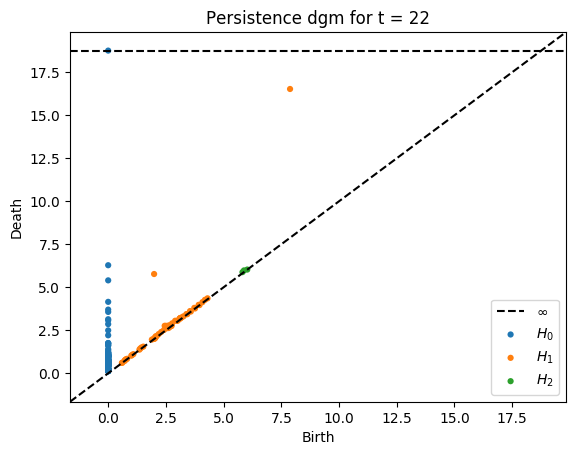

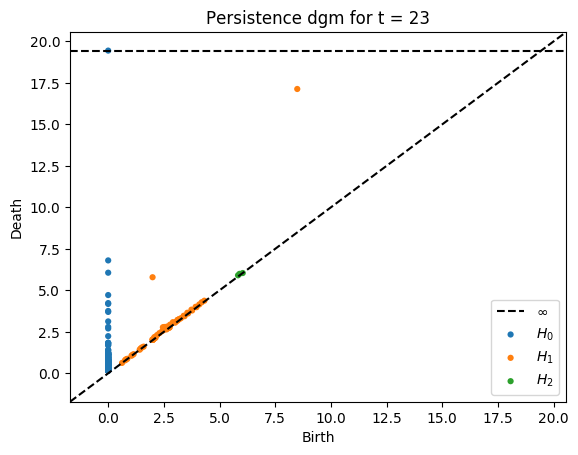

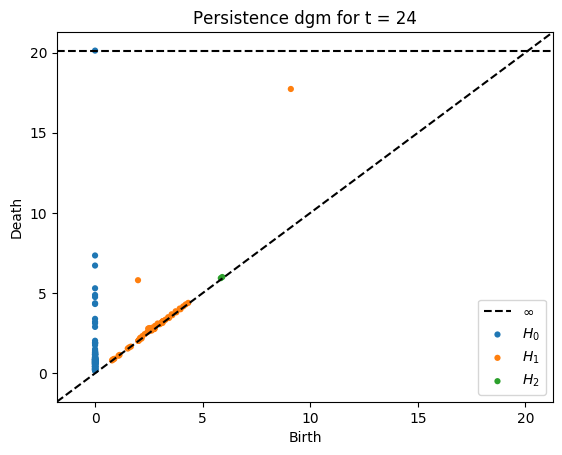

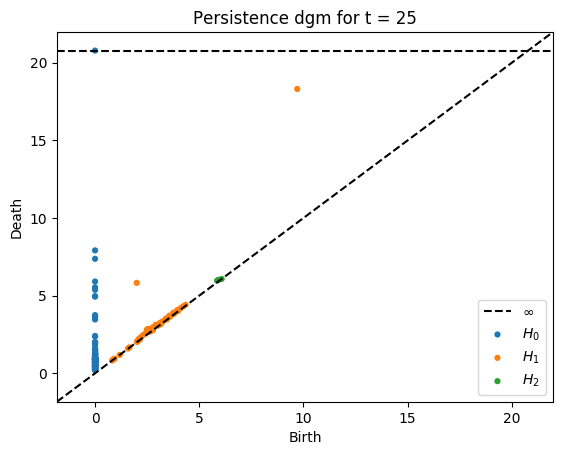

In [6]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

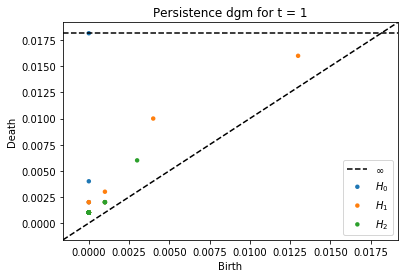

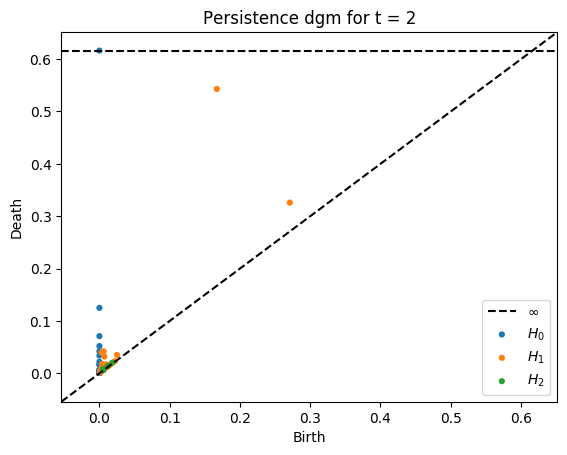

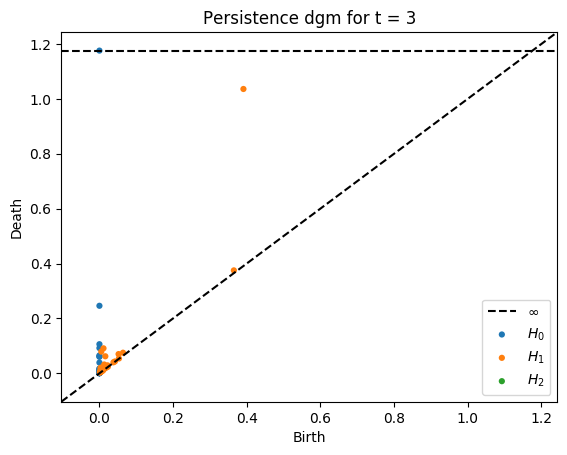

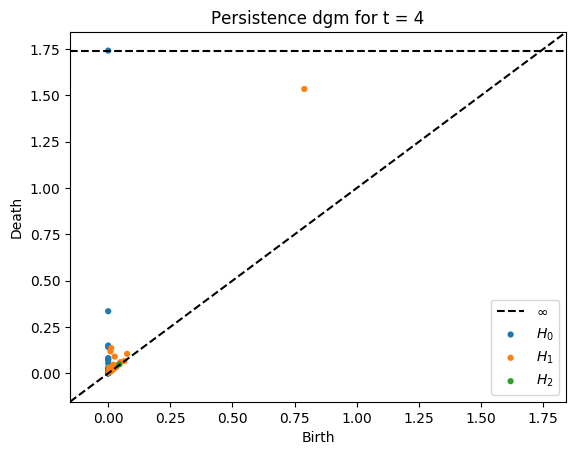

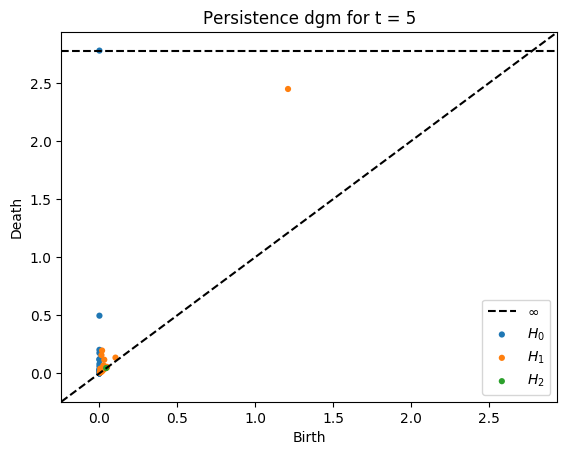

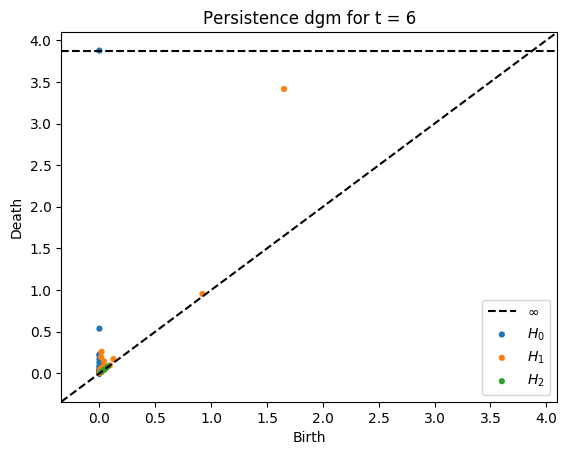

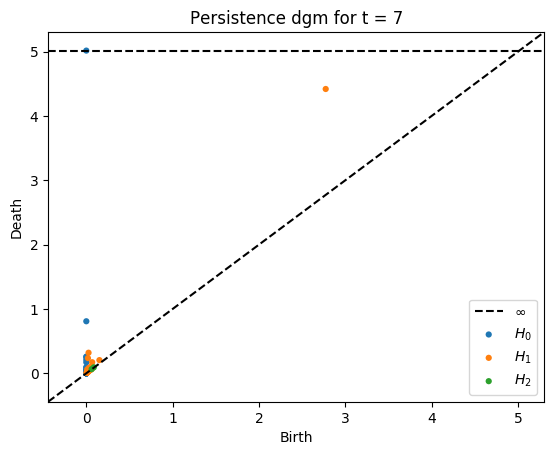

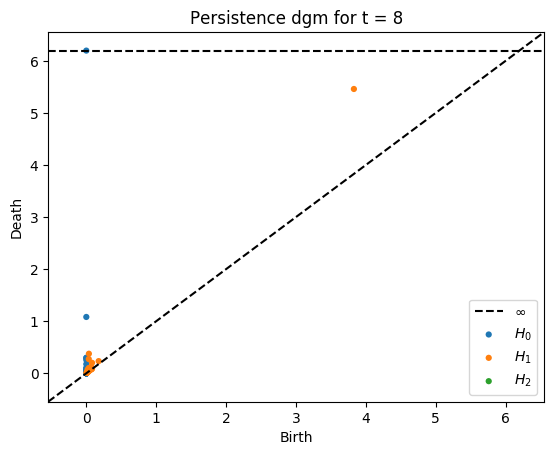

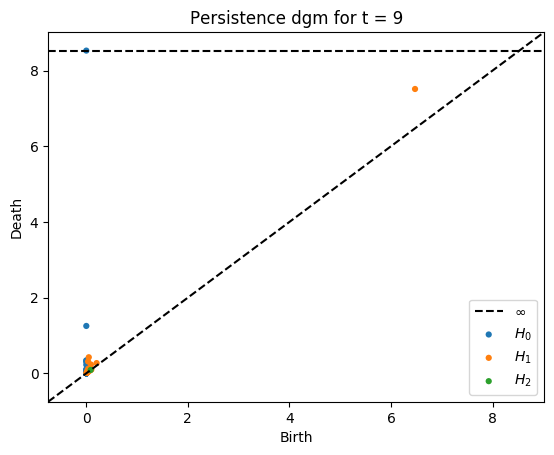

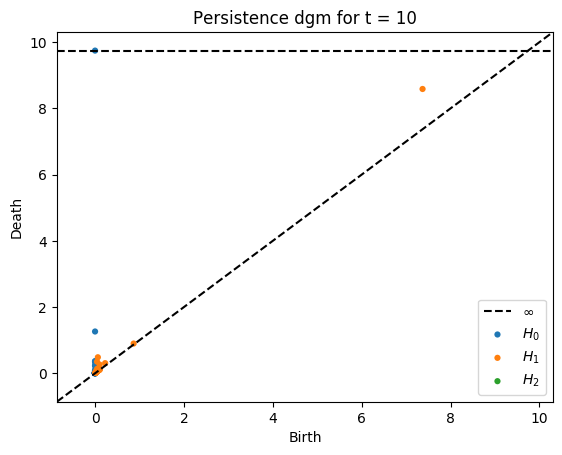

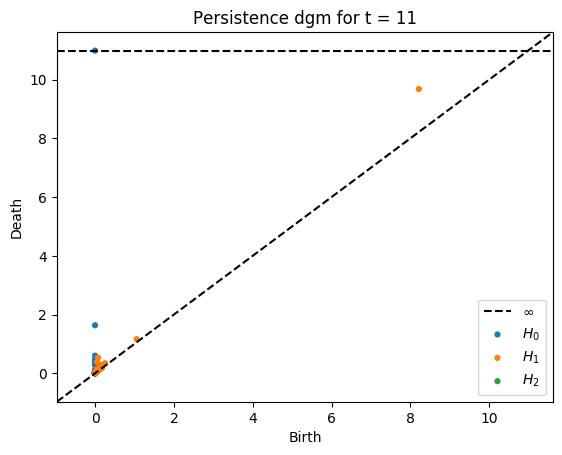

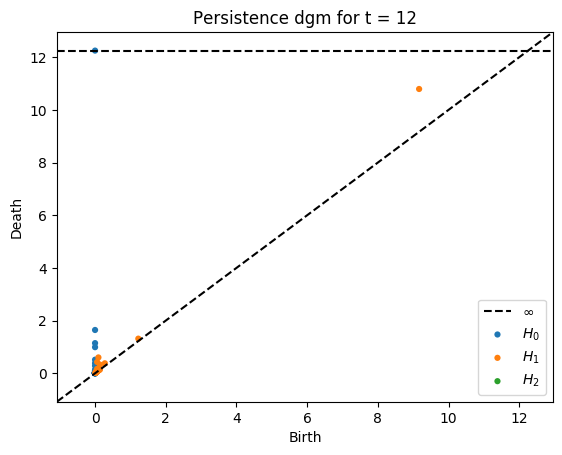

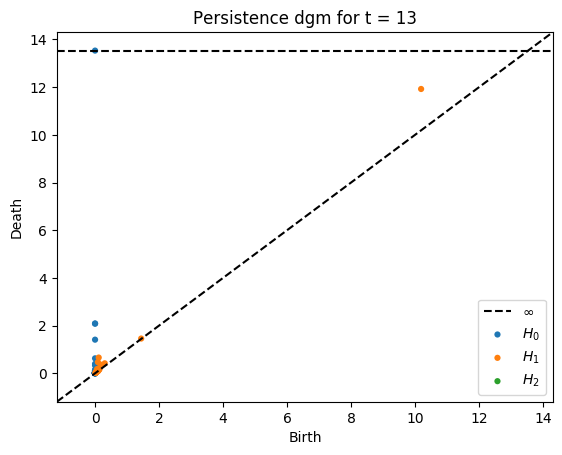

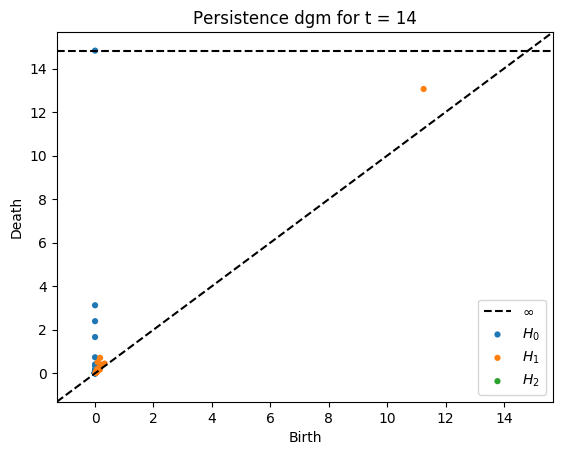

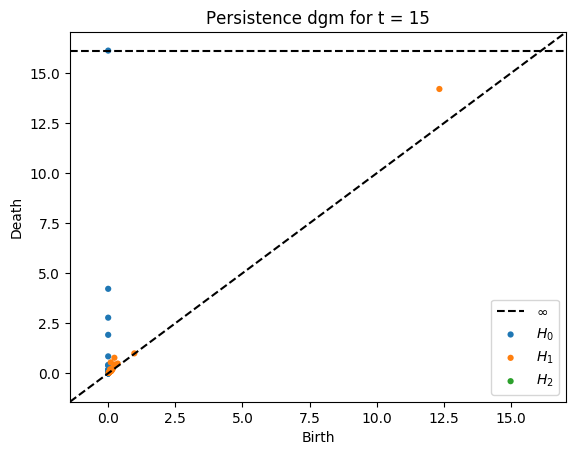

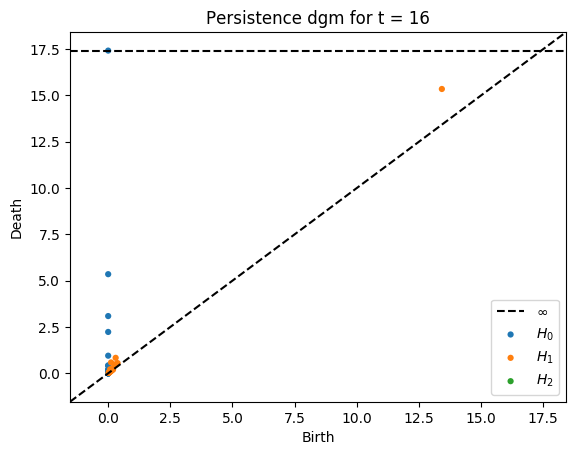

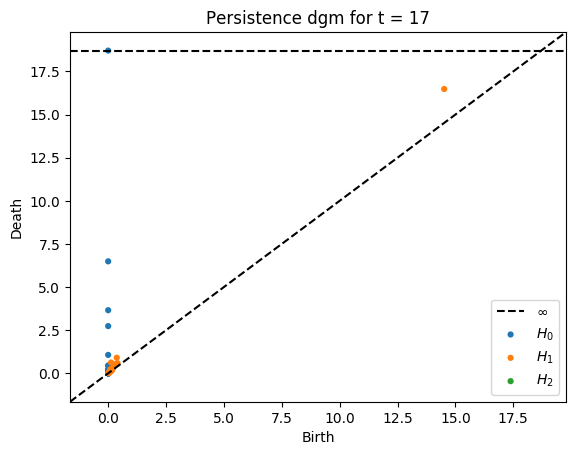

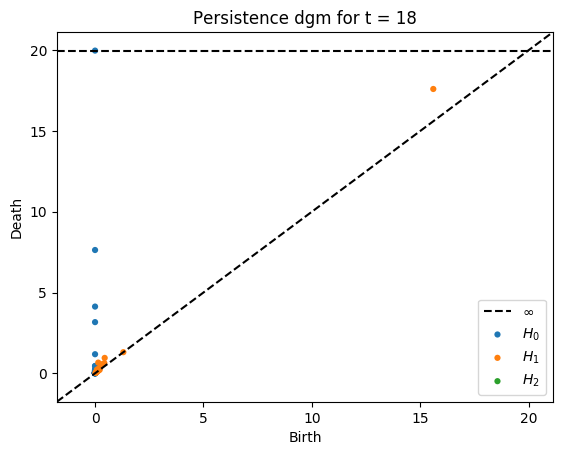

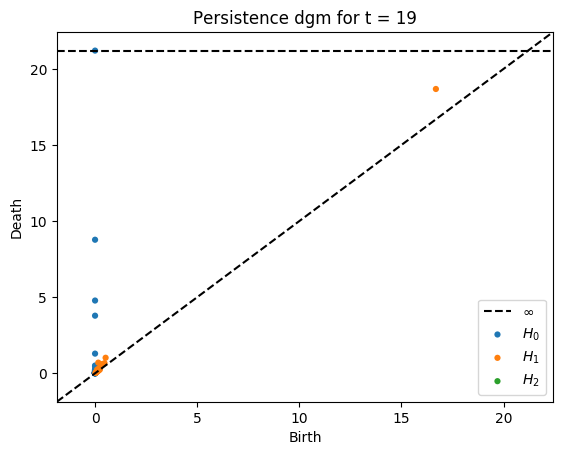

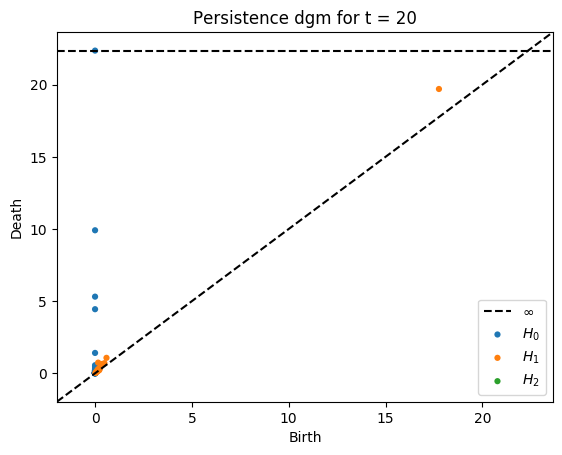

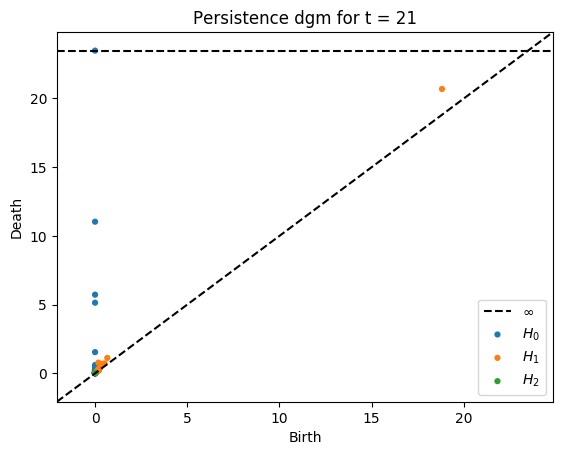

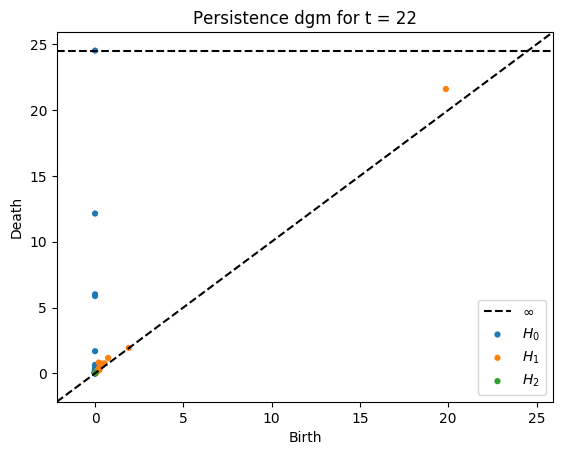

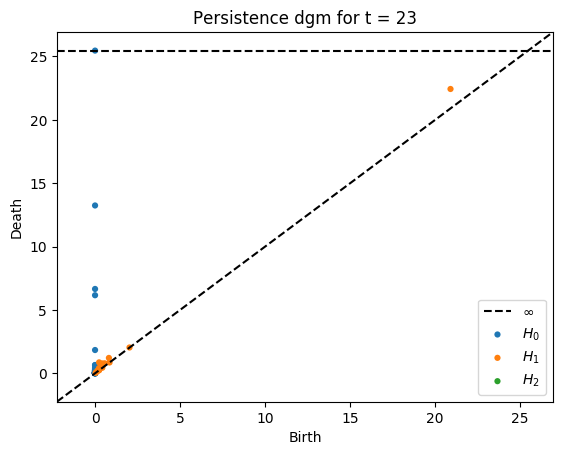

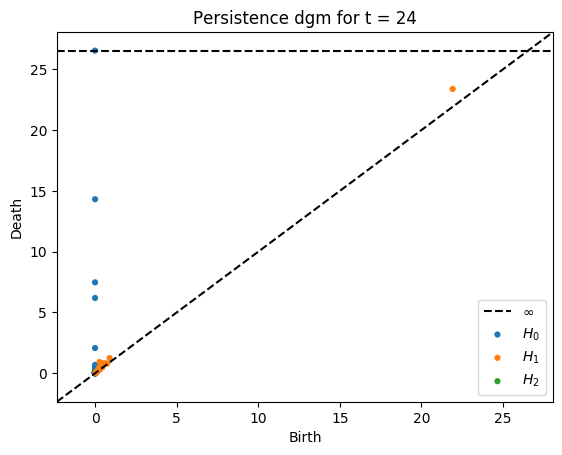

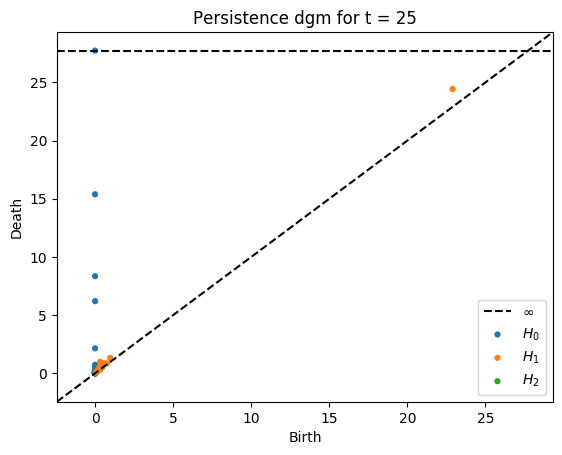

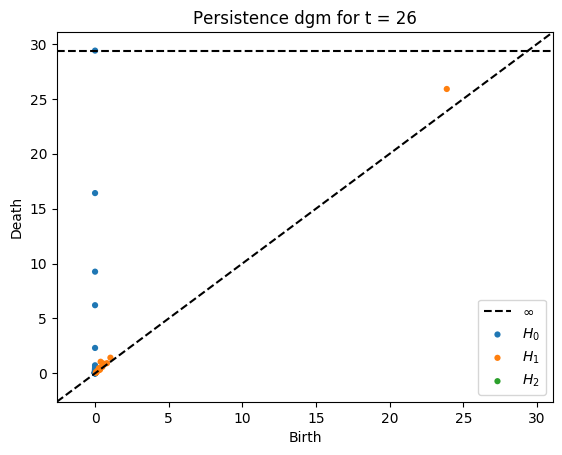

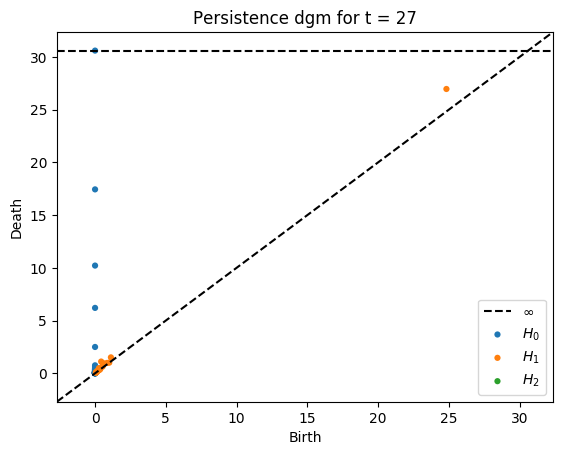

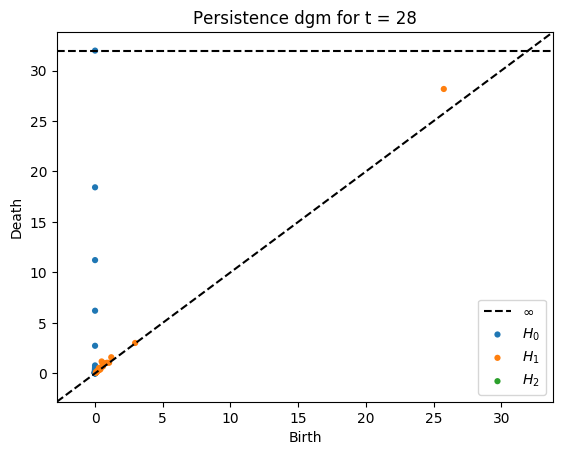

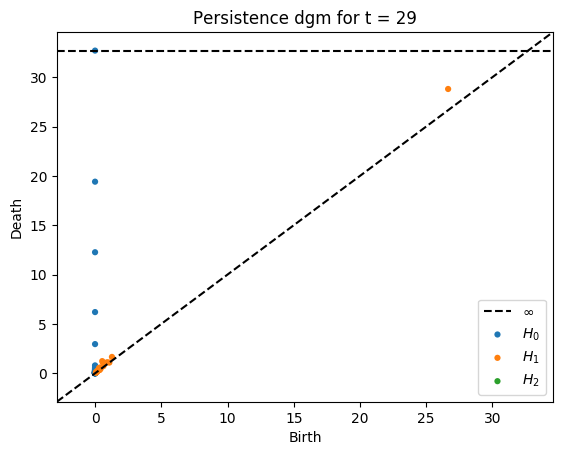

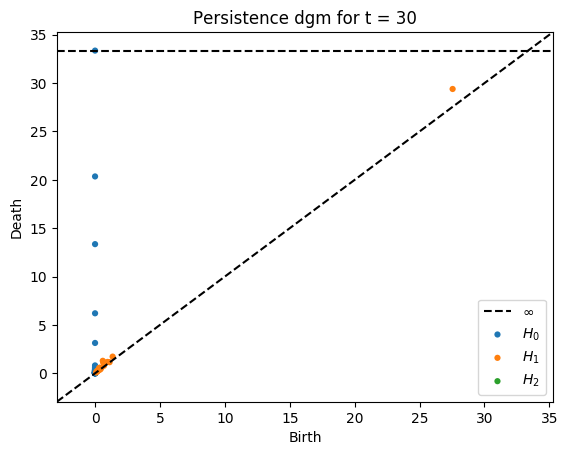

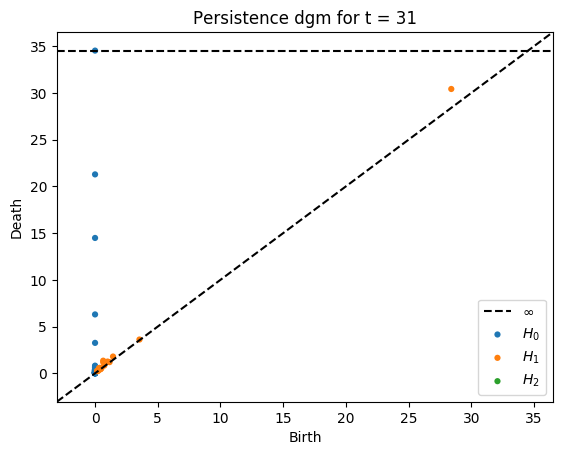

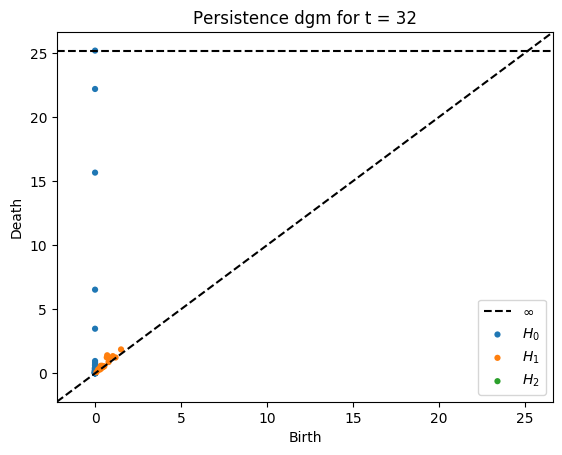

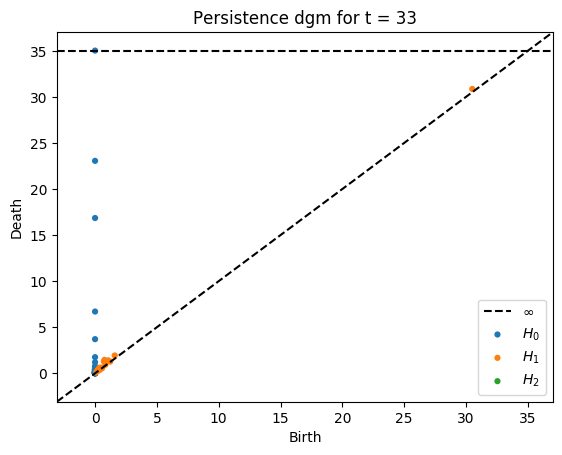

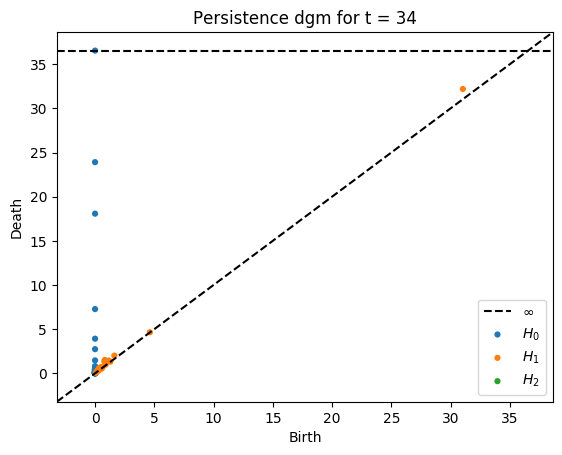

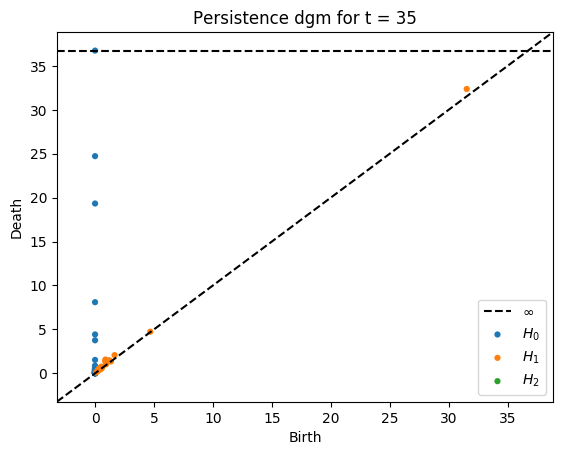

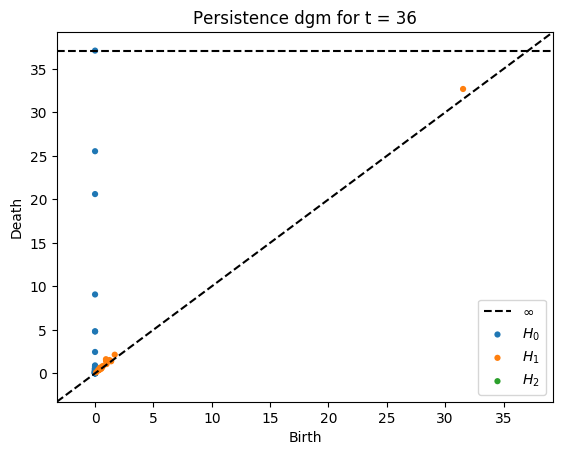

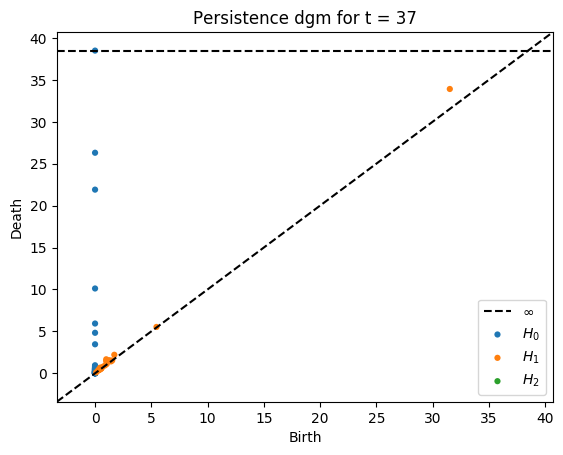

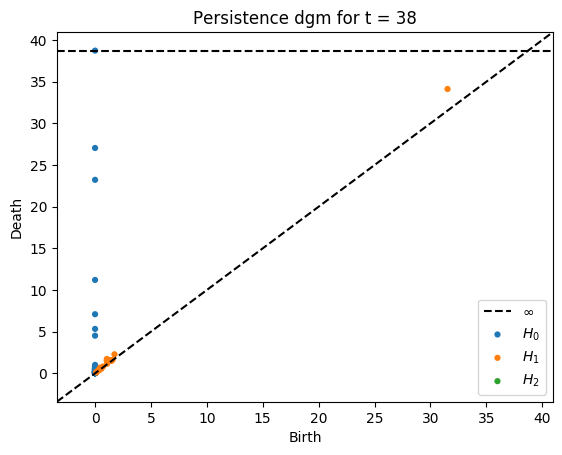

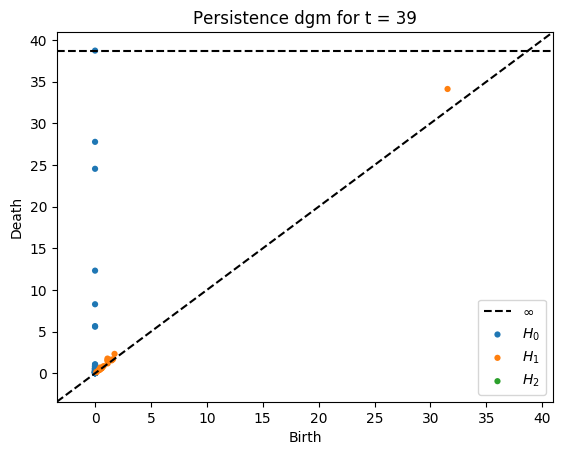

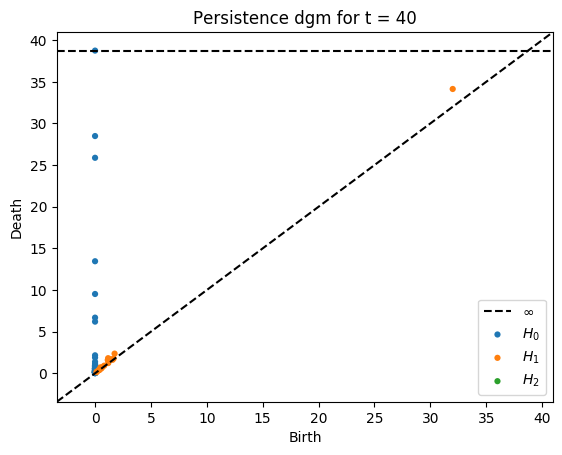

In [9]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)